In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [33]:
import numpy as np
import pandas as pd 
import math
import os
import sys
import mne
import random
import glob
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

ROOT_DIR = '/content/drive/Team Drives/CMPS 144: EEG Data Analysis/'
init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [30]:
!{sys.executable} -m pip install mne

    100% |████████████████████████████████| 6.2MB 4.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/59/23/bb/ebafe2eae31064edfb9b384131abd0ec562a9418601cde6d69
Successfully built mne


In [0]:
"""
Initial set up of the data files, only needed to be run once for now. 

We can now load the dataframes using the pickled file, load times are 
significantly reduced.

So ignore this block unless there are issues with loading the pickled files.
"""

def initData():
  train_data = pd.DataFrame({})
  test_data  = pd.DataFrame({})

  for filepath in tqdm(glob.iglob(ROOT_DIR +'data/train/*.csv')):
    train_data = train_data.append(pd.read_csv(filepath))

  for filepath in tqdm(glob.iglob(ROOT_DIR +'data/test/*.csv')):
    test_data  = test_data.append(pd.read_csv(filepath))

  train_data = train_data.drop(['Unnamed: 0'], axis=1)
  test_data  = test_data.drop( ['Unnamed: 0'], axis=1)

  train_data.to_pickle(ROOT_DIR + 'data/train.pkl')
  test_data.to_pickle( ROOT_DIR + 'data/test.pkl' )
  
  return train_data, test_data

In [0]:
train_data = pd.read_pickle(ROOT_DIR + 'data/train.pkl')
test_data  = pd.read_pickle(ROOT_DIR + 'data/test.pkl')

In [16]:
# sensors = ['LPA','RPA','Nz','FP1','FPZ','FP2','AF9','AF7','AF5','AF3','AF1','AFZ','AF2','AF4','AF6','AF8','AF10','F9','F7','F5','F3','F1','FZ','F2','F4','F6','F8','F10','FT9','FT7','FC5','FC3','FC1','FCZ','FC2','FC4','FC6','FT8','FT10','T9','T7','C5','C3','C1','CZ','C2','C4','C6','T8','T10','TP9','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6','TP8','TP10','P9','P7','P5','P3','P1','PZ','P2','P4','P6','P8','P10','PO9','PO7','PO5','PO3','PO1','POZ','PO2','PO4','PO6','PO8','PO10','O1','OZ','O2','I1','Iz','I2','AFp9h','AFp7h','AFp5h','AFp3h','AFp1h','AFp2h','AFp4h','AFp6h','AFp8h','AFp10h','AFF9h','AFF7h','AFF5h','AFF3h','AFF1h','AFF2h','AFF4h','AFF6h','AFF8h','AFF10h','FFT9h','FFT7h','FFC5h','FFC3h','FFC1h','FFC2h','FFC4h','FFC6h','FFT8h','FFT10h','FTT9h','FTT7h','FCC5h','FCC3h','FCC1h','FCC2h','FCC4h','FCC6h','FTT8h','FTT10h','TTP9h','TTP7h','CCP5h','CCP3h','CCP1h','CCP2h','CCP4h','CCP6h','TTP8h','TTP10h','TPP9h','TPP7h','CPP5h','CPP3h','CPP1h','CPP2h','CPP4h','CPP6h','TPP8h','TPP10h','PPO9h','PPO7h','PPO5h','PPO3h','PPO1h','PPO2h','PPO4h','PPO6h','PPO8h','PPO10h','POO9h','POO7h','POO5h','POO3h','POO1h','POO2h','POO4h','POO6h','POO8h','POO10h','OI1h','OI2h','Fp1h','Fp2h','AF9h','AF7h','AF5h','AF3h','AF1h','AF2h','AF4h','AF6h','AF8h','AF10h','F9h','F7h','F5h','F3h','F1h','F2h','F4h','F6h','F8h','F10h','FT9h','FT7h','FC5h','FC3h','FC1h','FC2h','FC4h','FC6h','FT8h','FT10h','T9h','T7h','C5h','C3h','C1h','C2h','C4h','C6h','T8h','T10h','TP9h','TP7h','CP5h','CP3h','CP1h','CP2h','CP4h','CP6h','TP8h','TP10h','P9h','P7h','P5h','P3h','P1h','P2h','P4h','P6h','P8h','P10h','PO9h','PO7h','PO5h','PO3h','PO1h','PO2h','PO4h','PO6h','PO8h','PO10h','O1h','O2h','I1h','I2h','AFp9','AFp7','AFp5','AFp3','AFp1','AFpz','AFp2','AFp4','AFp6','AFp8','AFp10','AFF9','AFF7','AFF5','AFF3','AFF1','AFFz','AFF2','AFF4','AFF6','AFF8','AFF10','FFT9','FFT7','FFC5','FFC3','FFC1','FFCz','FFC2','FFC4','FFC6','FFT8','FFT10','FTT9','FTT7','FCC5','FCC3','FCC1','FCCz','FCC2','FCC4','FCC6','FTT8','FTT10','TTP9','TTP7','CCP5','CCP3','CCP1','CCPz','CCP2','CCP4','CCP6','TTP8','TTP10','TPP9','TPP7','CPP5','CPP3','CPP1','CPPz','CPP2','CPP4','CPP6','TPP8','TPP10','PPO9','PPO7','PPO5','PPO3','PPO1','PPOz','PPO2','PPO4','PPO6','PPO8','PPO10','POO9','POO7','POO5','POO3','POO1','POOz','POO2','POO4','POO6','POO8','POO10','OI1','OIz','OI2','T3','T5','T4','T6']
# coords = [[0.0000, 0.9237, -0.3826],[0.0000, -0.9237, -0.3826],[0.9230, 0.0000, -0.3824],[0.9511, 0.3090, 0.0001],[1.0000, 0.0000, 0.0001],[0.9511, -0.3091, 0.0000],[0.7467, 0.5425, -0.3825],[0.8090, 0.5878, 0.0000],[0.8553, 0.4926, 0.1552],[0.8920, 0.3554, 0.2782],[0.9150, 0.1857, 0.3558],[0.9230, 0.0000, 0.3824],[0.9150, -0.1857, 0.3558],[0.8919, -0.3553, 0.2783],[0.8553, -0.4926, 0.1552],[0.8090, -0.5878, 0.0000],[0.7467, -0.5425, -0.3825],[0.5430, 0.7472, -0.3826],[0.5878, 0.8090, 0.0000],[0.6343, 0.7210, 0.2764],[0.6726, 0.5399, 0.5043],[0.6979, 0.2888, 0.6542],[0.7067, 0.0000, 0.7067],[0.6979, -0.2888, 0.6542],[0.6726, -0.5399, 0.5043],[0.6343, -0.7210, 0.2764],[0.5878, -0.8090, 0.0000],[0.5429, -0.7472, -0.3826],[0.2852, 0.8777, -0.3826],[0.3090, 0.9511, 0.0000],[0.3373, 0.8709, 0.3549],[0.3612, 0.6638, 0.6545],[0.3770, 0.3581, 0.8532],[0.3826, 0.0000, 0.9233],[0.3770, -0.3581, 0.8532],[0.3612, -0.6638, 0.6545],[0.3373, -0.8709, 0.3549],[0.3090, -0.9511, 0.0000],[0.2852, -0.8777, -0.3826],[-0.0001, 0.9237, -0.3826],[0.0000, 1.0000, 0.0000],[0.0001, 0.9237, 0.3826],[0.0001, 0.7066, 0.7066],[0.0002, 0.3824, 0.9231],[0.0002, 0.0000, 1.0000],[0.0001, -0.3824, 0.9231],[0.0001, -0.7066, 0.7066],[0.0001, -0.9237, 0.3826],[0.0000, -1.0000, 0.0000],[0.0000, -0.9237, -0.3826],[-0.2852, 0.8777, -0.3826],[-0.3090, 0.9511, -0.0001],[-0.3372, 0.8712, 0.3552],[-0.3609, 0.6635, 0.6543],[-0.3767, 0.3580, 0.8534],[-0.3822, 0.0000, 0.9231],[-0.3767, -0.3580, 0.8534],[-0.3608, -0.6635, 0.6543],[-0.3372, -0.8712, 0.3552],[-0.3090, -0.9511, -0.0001],[-0.2853, -0.8777, -0.3826],[-0.5429, 0.7472, -0.3826],[-0.5878, 0.8090, -0.0001],[-0.6342, 0.7211, 0.2764],[-0.6724, 0.5401, 0.5045],[-0.6975, 0.2889, 0.6545],[-0.7063, 0.0000, 0.7065],[-0.6975, -0.2889, 0.6545],[-0.6724, -0.5401, 0.5045],[-0.6342, -0.7211, 0.2764],[-0.5878, -0.8090, -0.0001],[-0.5429, -0.7472, -0.3826],[-0.7467, 0.5425, -0.3825],[-0.8090, 0.5878, 0.0000],[-0.8553, 0.4929, 0.1555],[-0.8918, 0.3549, 0.2776],[-0.9151, 0.1858, 0.3559],[-0.9230, 0.0000, 0.3824],[-0.9151, -0.1859, 0.3559],[-0.8918, -0.3549, 0.2776],[-0.8553, -0.4929, 0.1555],[-0.8090, -0.5878, 0.0000],[-0.7467, -0.5425, -0.3825],[-0.9511, 0.3090, 0.0000],[-1.0000, 0.0000, 0.0000],[-0.9511, -0.3090, 0.0000],[-0.8785, 0.2854, -0.3824],[-0.9230, 0.0000, -0.3823],[-0.8785, -0.2854, -0.3824],[0.8732, 0.4449, -0.1949],[0.9105, 0.4093, 0.0428],[0.9438, 0.3079, 0.1159],[0.9669, 0.1910, 0.1666],[0.9785, 0.0647, 0.1919],[0.9785, -0.0647, 0.1919],[0.9669, -0.1910, 0.1666],[0.9438, -0.3079, 0.1159],[0.9105, -0.4093, 0.0428],[0.8732, -0.4449, -0.1949],[0.6929, 0.6929, -0.1949],[0.7325, 0.6697, 0.1137],[0.7777, 0.5417, 0.3163],[0.8111, 0.3520, 0.4658],[0.8289, 0.1220, 0.5452],[0.8289, -0.1220, 0.5452],[0.8111, -0.3520, 0.4658],[0.7777, -0.5417, 0.3163],[0.7325, -0.6697, 0.1138],[0.6929, -0.6929, -0.1949],[0.4448, 0.8730, -0.1950],[0.4741, 0.8642, 0.1647],[0.5107, 0.7218, 0.4651],[0.5384, 0.4782, 0.6925],[0.5533, 0.1672, 0.8148],[0.5533, -0.1672, 0.8148],[0.5384, -0.4782, 0.6925],[0.5107, -0.7218, 0.4651],[0.4741, -0.8642, 0.1647],[0.4448, -0.8730, -0.1950],[0.1533, 0.9678, -0.1950],[0.1640, 0.9669, 0.1915],[0.1779, 0.8184, 0.5448],[0.1887, 0.5466, 0.8154],[0.1944, 0.1919, 0.9615],[0.1944, -0.1919, 0.9615],[0.1887, -0.5466, 0.8154],[0.1779, -0.8184, 0.5448],[0.1640, -0.9669, 0.1915],[0.1533, -0.9678, -0.1950],[-0.1532, 0.9678, -0.1950],[-0.1639, 0.9669, 0.1915],[-0.1778, 0.8185, 0.5449],[-0.1883, 0.5465, 0.8153],[-0.1940, 0.1918, 0.9611],[-0.1940, -0.1918, 0.9611],[-0.1884, -0.5465, 0.8153],[-0.1778, -0.8185, 0.5449],[-0.1639, -0.9669, 0.1915],[-0.1533, -0.9678, -0.1950],[-0.4448, 0.8731, -0.1950],[-0.4740, 0.8639, 0.1646],[-0.5106, 0.7220, 0.4653],[-0.5384, 0.4786, 0.6933],[-0.5532, 0.1673, 0.8155],[-0.5532, -0.1673, 0.8155],[-0.5384, -0.4786, 0.6933],[-0.5106, -0.7220, 0.4653],[-0.4740, -0.8638, 0.1646],[-0.4449, -0.8731, -0.1950],[-0.6928, 0.6928, -0.1950],[-0.7324, 0.6700, 0.1139],[-0.7776, 0.5420, 0.3167],[-0.8108, 0.3520, 0.4659],[-0.8284, 0.1220, 0.5453],[-0.8284, -0.1220, 0.5453],[-0.8108, -0.3519, 0.4659],[-0.7775, -0.5421, 0.3167],[-0.7324, -0.6700, 0.1139],[-0.6928, -0.6928, -0.1950],[-0.8730, 0.4448, -0.1950],[-0.9106, 0.4097, 0.0430],[-0.9438, 0.3080, 0.1160],[-0.9665, 0.1908, 0.1657],[-0.9783, 0.0647, 0.1918],[-0.9783, -0.0647, 0.1918],[-0.9665, -0.1908, 0.1657],[-0.9438, -0.3080, 0.1160],[-0.9106, -0.4097, 0.0430],[-0.8730, -0.4448, -0.1950],[-0.9679, 0.1533, -0.1950],[-0.9679, -0.1533, -0.1950],[0.9877, 0.1564, 0.0001],[0.9877, -0.1564, 0.0001],[0.7928, 0.5759, -0.1949],[0.8332, 0.5463, 0.0810],[0.8750, 0.4284, 0.2213],[0.9053, 0.2735, 0.3231],[0.9211, 0.0939, 0.3758],[0.9210, -0.0939, 0.3758],[0.9053, -0.2735, 0.3231],[0.8750, -0.4284, 0.2212],[0.8332, -0.5463, 0.0810],[0.7927, -0.5759, -0.1949],[0.5761, 0.7929, -0.1949],[0.6117, 0.7772, 0.1420],[0.6549, 0.6412, 0.3987],[0.6872, 0.4214, 0.5906],[0.7045, 0.1468, 0.6933],[0.7045, -0.1468, 0.6933],[0.6872, -0.4214, 0.5906],[0.6549, -0.6412, 0.3987],[0.6117, -0.7772, 0.1420],[0.5761, -0.7929, -0.1949],[0.3027, 0.9317, -0.1950],[0.3235, 0.9280, 0.1813],[0.3500, 0.7817, 0.5146],[0.3703, 0.5207, 0.7687],[0.3811, 0.1824, 0.9054],[0.3811, -0.1824, 0.9054],[0.3703, -0.5207, 0.7687],[0.3500, -0.7817, 0.5146],[0.3235, -0.9280, 0.1813],[0.3028, -0.9317, -0.1950],[0.0000, 0.9801, -0.1950],[0.0000, 0.9801, 0.1949],[0.0001, 0.8311, 0.5552],[0.0002, 0.5550, 0.8306],[0.0001, 0.1950, 0.9801],[0.0002, -0.1950, 0.9801],[0.0002, -0.5550, 0.8306],[0.0001, -0.8311, 0.5552],[0.0000, -0.9801, 0.1949],[0.0000, -0.9801, -0.1950],[-0.3028, 0.9319, -0.1949],[-0.3234, 0.9278, 0.1813],[-0.3498, 0.7818, 0.5148],[-0.3699, 0.5206, 0.7688],[-0.3808, 0.1825, 0.9059],[-0.3808, -0.1825, 0.9059],[-0.3699, -0.5206, 0.7688],[-0.3498, -0.7818, 0.5148],[-0.3234, -0.9278, 0.1813],[-0.3028, -0.9319, -0.1949],[-0.5761, 0.7929, -0.1950],[-0.6116, 0.7771, 0.1420],[-0.6546, 0.6411, 0.3985],[-0.6869, 0.4217, 0.5912],[-0.7041, 0.1469, 0.6934],[-0.7041, -0.1469, 0.6934],[-0.6870, -0.4216, 0.5912],[-0.6546, -0.6411, 0.3985],[-0.6116, -0.7771, 0.1420],[-0.5761, -0.7929, -0.1950],[-0.7926, 0.5759, -0.1950],[-0.8331, 0.5459, 0.0809],[-0.8752, 0.4292, 0.2219],[-0.9054, 0.2737, 0.3233],[-0.9210, 0.0939, 0.3757],[-0.9210, -0.0940, 0.3757],[-0.9054, -0.2737, 0.3233],[-0.8752, -0.4292, 0.2219],[-0.8331, -0.5459, 0.0809],[-0.7926, -0.5758, -0.1950],[-0.9877, 0.1564, 0.0000],[-0.9877, -0.1564, 0.0000],[-0.9118, 0.1444, -0.3824],[-0.9118, -0.1444, -0.3824],[0.8225, 0.4190, -0.3825],[0.8910, 0.4540, 0.0000],[0.9282, 0.3606, 0.0817],[0.9565, 0.2508, 0.1438],[0.9743, 0.1287, 0.1828],[0.9799, 0.0000, 0.1949],[0.9743, -0.1287, 0.1828],[0.9565, -0.2508, 0.1437],[0.9282, -0.3606, 0.0817],[0.8910, -0.4540, 0.0000],[0.8225, -0.4191, -0.3825],[0.6527, 0.6527, -0.3825],[0.7071, 0.7071, 0.0000],[0.7564, 0.6149, 0.2206],[0.7962, 0.4535, 0.3990],[0.8221, 0.2404, 0.5148],[0.8312, 0.0000, 0.5554],[0.8221, -0.2404, 0.5148],[0.7962, -0.4535, 0.3990],[0.7564, -0.6149, 0.2206],[0.7071, -0.7071, 0.0000],[0.6527, -0.6527, -0.3825],[0.4192, 0.8226, -0.3826],[0.4540, 0.8910, 0.0000],[0.4932, 0.8072, 0.3215],[0.5260, 0.6110, 0.5905],[0.5477, 0.3286, 0.7685],[0.5553, 0.0000, 0.8310],[0.5477, -0.3286, 0.7685],[0.5260, -0.6110, 0.5905],[0.4932, -0.8072, 0.3216],[0.4540, -0.8910, 0.0000],[0.4192, -0.8226, -0.3826],[0.1444, 0.9119, -0.3826],[0.1565, 0.9877, 0.0000],[0.1713, 0.9099, 0.3754],[0.1838, 0.6957, 0.6933],[0.1922, 0.3764, 0.9059],[0.1951, 0.0000, 0.9804],[0.1922, -0.3764, 0.9059],[0.1838, -0.6957, 0.6933],[0.1713, -0.9099, 0.3754],[0.1564, -0.9877, 0.0000],[0.1444, -0.9119, -0.3826],[-0.1444, 0.9117, -0.3826],[-0.1564, 0.9877, -0.0001],[-0.1711, 0.9100, 0.3754],[-0.1836, 0.6959, 0.6936],[-0.1918, 0.3763, 0.9056],[-0.1948, 0.0000, 0.9800],[-0.1919, -0.3763, 0.9056],[-0.1836, -0.6959, 0.6936],[-0.1711, -0.9100, 0.3754],[-0.1564, -0.9877, -0.0001],[-0.1444, -0.9117, -0.3826],[-0.4191, 0.8225, -0.3826],[-0.4540, 0.8910, -0.0001],[-0.4931, 0.8073, 0.3216],[-0.5259, 0.6109, 0.5904],[-0.5476, 0.3285, 0.7685],[-0.5551, 0.0000, 0.8311],[-0.5475, -0.3286, 0.7685],[-0.5258, -0.6109, 0.5904],[-0.4931, -0.8073, 0.3216],[-0.4540, -0.8910, -0.0001],[-0.4191, -0.8225, -0.3826],[-0.6529, 0.6529, -0.3825],[-0.7071, 0.7071, 0.0000],[-0.7561, 0.6147, 0.2205],[-0.7960, 0.4537, 0.3995],[-0.8218, 0.2405, 0.5152],[-0.8306, 0.0000, 0.5551],[-0.8218, -0.2405, 0.5152],[-0.7960, -0.4537, 0.3995],[-0.7562, -0.6147, 0.2205],[-0.7071, -0.7071, 0.0000],[-0.6529, -0.6529, -0.3825],[-0.8228, 0.4191, -0.3824],[-0.8910, 0.4540, 0.0000],[-0.9283, 0.3608, 0.0818],[-0.9567, 0.2511, 0.1442],[-0.9739, 0.1285, 0.1822],[-0.9797, 0.0000, 0.1949],[-0.9739, -0.1286, 0.1822],[-0.9567, -0.2511, 0.1442],[-0.9283, -0.3608, 0.0818],[-0.8910, -0.4540, 0.0000],[-0.8228, -0.4191, -0.3824],[-0.9322, 0.3029, -0.1949],[-0.9799, 0.0000, -0.1949],[-0.9322, -0.3029, -0.1949],[0.0000, 1.0000, 0.0000],[-0.5878, 0.8090, -0.0001],[0.0000, -1.0000, 0.0000],[-0.5878, -0.8090  -0.0001]]
'''

Dictonary of sensor x, y, z locations. Only includes sensors in study.

Adapted from:
http://eeg.sourceforge.net/doc_m2html/bioelectromagnetism/elec_1020all_cart.html

Coordinates are arranged diiferently than some standard images online, 
so all coordinates are rotated -90 degrees. 

We only care about x and y for now, so we'll throw out the z coordinate.

'''

def rotate_point(coord):
  RAD   = -1.57079633 # -90 degrees
  
  x =  coord[0] * math.cos(RAD)  + coord[1] * math.sin(RAD)
  y = -coord[0] * math.sin(RAD)  + coord[1] * math.cos(RAD)
  
  return [x,y]

SENSOR_MAP = {'FC6': [ 0.3373, -0.8709,  0.3549] , 'F1' : [ 0.6979,  0.2888,  0.6542], 
              'FP1': [ 0.9511,  0.3090,  0.0001] , 'CZ' : [ 0.0002,  0.0000,  1.0000], 
              'CP1': [-0.3767,  0.3580,  0.8534] , 'PZ' : [-0.7063,  0.0000,  0.7065], 
              'F3' : [ 0.6726,  0.5399,  0.5043] , 'P7' : [-0.5878,  0.8090, -0.0001], 
              'FC5': [ 0.3373,  0.8709,  0.3549] , 'CP3': [-0.3609,  0.6635,  0.6543], 
              'AF2': [ 0.9150, -0.1857,  0.3558] , 'T7' : [ 0.0000,  1.0000,  0.0000], 
              'FT7': [ 0.3090,  0.9511,  0.0000] , 'C4' : [ 0.0001, -0.7066,  0.7066], 
              'CP4': [-0.3608, -0.6635,  0.6543] , 'PO8': [-0.8090, -0.5878,  0.0000], 
              'CPZ': [-0.3822,  0.0000,  0.9231] , 'AF7': [ 0.8090,  0.5878,  0.0000], 
              'PO7': [-0.8090,  0.5878,  0.0000] , 'OZ' : [-1.0000,  0.0000,  0.0000], 
              'FP2': [ 0.9511, -0.3091,  0.0000] , 'CP2': [-0.3767, -0.3580,  0.8534], 
              'P4' : [-0.6724, -0.5401,  0.5045] , 'F7' : [ 0.5878,  0.8090,  0.0000], 
              'F6' : [ 0.6343, -0.7210,  0.2764] , 'FCZ': [ 0.3826,  0.0000,  0.9233], 
              'TP7': [-0.3090,  0.9511, -0.0001] , 'P1' : [-0.6975,  0.2889,  0.6545], 
              'P5' : [-0.6342,  0.7211,  0.2764] , 'O2' : [-0.9511, -0.3090,  0.0000], 
              'FC4': [ 0.3612, -0.6638,  0.6545] , 'C1' : [ 0.0002,  0.3824,  0.9231], 
              'AF1': [ 0.9150,  0.1857,  0.3558] , 'CP5': [-0.3372,  0.8712,  0.3552], 
              'AF8': [ 0.8090, -0.5878,  0.0000] , 'P8' : [-0.5878, -0.8090, -0.0001], 
              'PO1': [-0.9151,  0.1858,  0.3559] , 'FC1': [ 0.3770,  0.3581,  0.8532], 
              'F8' : [ 0.5878, -0.8090,  0.0000] , 'FC3': [ 0.3612,  0.6638,  0.6545], 
              'C3' : [ 0.0001,  0.7066,  0.7066] , 'F5' : [ 0.6343,  0.7210,  0.2764], 
              'FPZ': [ 1.0000,  0.0000,  0.0001] , 'C2' : [ 0.0001, -0.3824,  0.9231], 
              'P2' : [-0.6975, -0.2889,  0.6545] , 'PO2': [-0.9151, -0.1859,  0.3559], 
              'CP6': [-0.3372, -0.8712,  0.3552] , 'F2' : [ 0.6979, -0.2888,  0.6542], 
              'FC2': [ 0.3770, -0.3581,  0.8532] , 'P3' : [-0.6724,  0.5401,  0.5045], 
              'FT8': [ 0.3090, -0.9511,  0.0000] , 'C5' : [ 0.0001,  0.9237,  0.3826], 
              'AFZ': [ 0.9230,  0.0000,  0.3824] , 'POZ': [-0.9230,  0.0000,  0.3824], 
              'P6' : [-0.6342, -0.7211,  0.2764] , 'TP8': [-0.3090, -0.9511, -0.0001], 
              'T8' : [ 0.0000, -1.0000,  0.0000] , 'C6' : [ 0.0001, -0.9237,  0.3826], 
              'O1' : [-0.9511,  0.3090,  0.0000] , 'FZ' : [ 0.7067,  0.0000,  0.7067], 
              'F4' : [ 0.6726, -0.5399,  0.5043]
}

for sensor, coord in SENSOR_MAP.items(): SENSOR_MAP[sensor] = rotate_point(coord)



{'FC6': [0.8708999989189186, 0.3373000027913246], 'F1': [-0.2888000022368417, 0.6978999990743661], 'FP1': [-0.3090000030483739, 0.9510999990096229], 'CZ': [-6.410206909383679e-13, 0.0002], 'CP1': [-0.3579999987926375, -0.376700001147427], 'PZ': [2.263764570048846e-09, -0.7063], 'F3': [-0.5399000021557526, 0.6725999982695646], 'P7': [-0.8089999981160403, -0.5878000025929286], 'FC5': [-0.8709000010810815, 0.3372999972086754], 'CP3': [-0.6634999988432781, -0.36090000212658613], 'AF2': [0.18569999706733034, 0.9150000005951877], 'T7': [-1.0, -3.205103454691839e-09], 'FT7': [-0.951100000990377, 0.3089999969516261], 'C4': [0.7065999999996795, 0.00010000226472610109], 'CP4': [0.6635000011564013, -0.3607999978734139], 'PO8': [0.5878000025929286, -0.8089999981160403], 'CPZ': [1.2249905403832208e-09, -0.3822], 'AF7': [-0.5878000025929286, 0.8089999981160403], 'PO7': [-0.5877999974070713, -0.8090000018839598], 'OZ': [3.205103454691839e-09, -1.0], 'FP2': [0.3090999969516261, 0.9511000009906975], 'C

In [25]:
sample_df = train_data[train_data['name'] =='co2a0000364']

sample_df = sample_df[(sample_df['sensor position'] != 'X') &
                      (sample_df['sensor position'] != 'Y') &
                      (sample_df['sensor position'] != 'nd')
            ]


# data = sample_df['sensor value']
# channel_names = list(set(sample_df['sensor position']))
# sample_rate = 256 #Hz

# info = mne.create_info(channel_names, sample_rate)

# raw = mne.io.RawArray(data, info)
# raw.plot()



NameError: ignored

In [0]:
sb_sample_df = sample_df[['sensor position', 'sensor value', 'time', 'channel']]

In [42]:
# sb_sample_df = sb_sample_df[sb_sample_df['time'] == 0.0]
sb_sample_df.head()

data          = np.random.randn(61, 7680)

channel_names = list(set(sample_df['sensor position']))
sample_rate   = 256 #Hz

info = mne.create_info(channel_names, sample_rate)
print(info)



# print(len(sb_sample_df[sb_sample_df['sensor position'] == 'FP1']))
# 
# print(info)
# raw = mne.io.RawArray(data, info)
# raw.plot()

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | FC6, F1, FP1, CZ, CP1, PZ, F3, P7, FC5, ...
    chs : list | 61 items (MISC: 61)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>


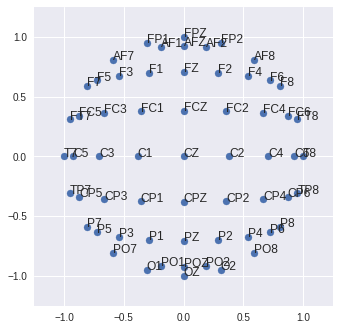

In [0]:
fig, ax = plt.subplots()
ax.scatter(x,y)

# for i,txt in enumerate(name):
#   ax.annotate(txt, (x[i], y[i]))

limit = 1.25
plt.xlim(-limit , limit)
plt.ylim(-limit , limit)
plt.gca().set_aspect('equal', adjustable='box')
  
plt.show()